In [130]:
# ---------Курсач-----#

import math as m
import numpy as np
import matplotlib.pyplot as plt
K = 1.79
T1 = 67
T2 = 28
T3 = 11
t = 36
T0 = 0.03*T1/K


In [103]:
#-------------------------------Пункт №3----------------------------#
#Обеспечение точности эпсилон
e = np.array([0.01, 0.02, 0.03, 0.04, 0.05])
T01 = np.array([e[0]*T1/K, e[1]*T1/K, e[2]*T1/K, e[3]*T1/K, e[4]*T1/K])
print("T01 = " + str(T01))
T02 = np.array([e[0]*(T1+T2)/K, e[1]*(T1+T2)/K, e[2]*(T1+T2)/K, e[3]*(T1+T2)/K, e[4]*(T1+T2)/K])
print("T02 = " + str(T02))
#Для Джури и для объекта с динамикой в числителе берешь любой сервис для решения уравнений и вставляешь туда функции с протокола  


T01 = [0.37430168 0.74860335 1.12290503 1.4972067  1.87150838]
T02 = [0.53072626 1.06145251 1.59217877 2.12290503 2.65363128]


In [104]:
#----------------------------------Пункт №4 ------------------------#
def Kr_opt(l):
    return (1 - m.exp(-T0 * l))/(K * (m.exp(T0/T1)-1)*(1 + m.floor(t/T0) * (1 - m.exp(-T0 * l))));

print("Kr_opt = " + str(Kr_opt(1/T1)) + "  " + str(Kr_opt(1/(T1*1.5))) + "  " + str(Kr_opt(1/(T1*2))) + "  " + str(Kr_opt(1/(T1*3))));
T_opt = T0/(m.exp(T0/T1) - 1);
print ("T_Iopt = " + str(T_opt));
print("Kn_opt = " + str(1/(1.8*(1 + t/T1))) + "  " + str(1/(1.8* 1.5*(1 + t/(1.5*T1)))) + "  " + str(1/(1.8*2*(1 + t/(2*T1)))) + "  " + str(1/(1.8*3*(1 + t/(3*T1)))));

Kr_opt = 0.35863598284065434  0.27093878443296815  0.21770339370174208  0.15628705064657056
T_Iopt = 66.44011578180304
Kn_opt = 0.36138079827400216  0.2726902726902727  0.2189542483660131  0.15705578996718234


In [105]:
#-----------------------------Пункт №5-------------------------------------#
#Резонансный метод
w1 =  0.02607     # Решается уравнение fi1 = 2.62 любым сервисом 
w2 =  0.02273    # Решается уравнение fi2 = 2.62 любым сервисом
print("w_n = " + str(w1/pow(2, 0.5)) + "  " + str(w2/pow(2, 0.5)))
print("w_v = " + str(w1*pow(2, 0.5)) + "  " + str(w2*pow(2, 0.5)))
print("A_n(w) = " + str(K/(m.sqrt((1 + w1*T1*w1*T1)*(1 + w1*T2*w1*T2)))) + "  " + str(K/(m.sqrt((1 + w2*T1*w2*T1)*(1 + w2*T2*w2*T2)*(1 + w2*T3*w2*T3)))))
anw = [K/(m.sqrt((1 + w1*T1*w1*T1)*(1 + w1*T2*w1*T2))), K/(m.sqrt((1 + w2*T1*w2*T1)*(1 + w2*T2*w2*T2)*(1 + w2*T3*w2*T3)))]

def fi2(w):
    return (m.atan(w*T1) + m.atan(w*T2)+ m.atan(w*T3) + w*t);

def fi1(w):
    return (m.atan(w*T1) + m.atan(w*T2) + w*t);

print("Ф_н(fi) = " + str(fi1(w1*m.sqrt(2)) - fi1(w1/m.sqrt(2))) + "  " + str(fi2(w2*m.sqrt(2)) - fi2(w2/m.sqrt(2))))
fnfi = [fi1(w1*m.sqrt(2)) - fi1(w1/m.sqrt(2)), fi2(w2*m.sqrt(2)) - fi2(w2/m.sqrt(2))]

def F_n1(w):
    return m.sqrt(((1 + w*T1*w*T1/2)*(1 + w*T2*w*T2/2))/((1 + w*T1*w*T1*2)*(1 + w*T2*w*T2*2)))
def F_n2(w):
    return (pow((1 + pow(w*T1,2)/2)*(1 + pow(w*T2,2)/2)*(1 + pow(w*T3,2)/2)/((1 + pow(w*T1,2)*2)*(1 + pow(w2*T2,2)*2)*(1 + pow(w*T3,2)*2)), 0.5))
print("Ф_н(A) = " + str(F_n1(w1)) + "  " + str(F_n2(w2)))
fna = [F_n1(w1), F_n2(w2)]

w_n = 0.018434273785533292  0.016072537136370225
w_v = 0.03686854757106659  0.03214507427274045
A_n(w) = 0.7183353500653512  0.8041154341437865
Ф_н(fi) = 1.2843808796961893  1.3671806700710718
Ф_н(A) = 0.4669193320965923  0.4829516480566392


In [106]:
T_nIopt1 = (4.061*pow(fna[0],-0.3387)*pow(fnfi[0], 0.2075))/w1
print("T_непIопт1 = " + str(T_nIopt1))
T_nIopt2 = (4.061*pow(fna[1],-0.3387)*pow(fnfi[1], 0.2075))/w2
print("T_непIопт2 = " + str(T_nIopt2))

T_непIопт1 = 212.36048664591553
T_непIопт2 = 243.93788996792756


In [107]:
K_nPopt1 = (1 + 1.189*pow(fna[0], 0.7139)*pow(1.852 - fnfi[0], 0.8643))/(2*anw[0])
print("K_непРопт1 = " + str(K_nPopt1))
K_nPopt2 = (1 + 1.189*pow(fna[1] ,0.7139)*pow(1.852 - fnfi[1], 0.8643))/(2*anw[1])
print("K_непРопт2 = " + str(K_nPopt2))

T_0opt1 = (0.5742*pow(fna[0], 0.5742)*pow(fnfi[0], 0.9394))/w1
print("Т_0опт1 = " + str(T_0opt1))
T_0opt2 = (0.5742*pow(fna[1], 0.5742)*pow(fnfi[1], 0.9394))/w2
print("Т_0опт2 = " + str(T_0opt2))

I1 = T_0opt1/K_nPopt1
I2 = T_0opt2/K_nPopt2

K_непРопт1 = 0.9905825925558335
K_непРопт2 = 0.8569913573897618
Т_0опт1 = 17.993175501075807
Т_0опт2 = 22.312903594028835


In [108]:
w3 = 0.02321 # Решается уравнение fi3 = 2.62 любым сервисом
w4 = 0.0202 # Решается уравнение fi4 = 2.62 любым сервисом
print("w_n = " + str(w3/m.sqrt(2)) + "  " + str(w4/m.sqrt(2)))
print("w_v = " + str(w3*m.sqrt(2)) + "  " + str(w4*m.sqrt(2)))
#print("A(w) = " + str(K/m.sqrt((1 + w3*T1*w3*T1)*(1 + w3*T2*w3*T2))) + "  " + str(K/m.sqrt((1 + w4*T1*w4*T1)*(1 + w4*T2*w4*T2)*(1 + w4*T3*w4*T3))))
#aw = [K*m.sin(w3 * T_0opt1 / 2)/(w3 * T_0opt1 / 2)/m.sqrt((1 + w3*T1*w3*T1)*(1 + w3*T2*w3*T2)), K*m.sin(w4 * T_0opt2 / 2)/(w4 * T_0opt2 / 2)/m.sqrt((1 + w4*T1*w4*T1)*(1 + w4*T2*w4*T2)*(1 + w4*T3*w4*T3))]
#print(aw)

w_n = 0.01641194839133977  0.014283556979968259
w_v = 0.03282389678267954  0.02856711395993652


In [109]:
def fi4(w):
    return (m.atan(w*T1) + m.atan(w*T2)+ m.atan(w*T3) + w*t + T_0opt2*w/2);

def fi3(w):
    return (m.atan(w*T1) + m.atan(w*T2) + w*t + T_0opt1*w/2);

ffi = [fi3(w3*m.sqrt(2)) - fi3(w3/m.sqrt(2)), fi4(w4*m.sqrt(2)) - fi4(w4/m.sqrt(2))]
print("Фн(fi) = " + str(ffi))

def A1(w):
    return (K*m.sin((w*T_0opt1)/2)/((pow((1 + pow(w3*T1,2))*(1 + pow(w3*T2,2)), 0.5))*((w*T_0opt1)/2)))

def A2(w):
    return (K*m.sin((w*T_0opt2)/2)/((pow((1 + pow(w4*T1,2))*(1 + pow(w4*T2,2))*(1 + pow(w4*T3,2)), 0.5))*((w*T_0opt2)/2)))
print("A(w) = " + str(A1(w3)) + "  " + str(A2(w4)))
print("Ф(А) = " + str(A1(w3*m.sqrt(2))/A1(w3/m.sqrt(2))) + "  " + str(A2(w4*m.sqrt(2))/A2(w4/m.sqrt(2))))
fia = [A1(w3*m.sqrt(2))/A1(w3/m.sqrt(2)), A2(w4*m.sqrt(2))/A2(w4/m.sqrt(2))]

Фн(fi) = [1.3622098572040042, 1.4423061899405634]
A(w) = 0.8059138962316932  0.8962140161445664
Ф(А) = 0.9891193013276307  0.9873300263029487


In [110]:
K_Popt1 = (1 + 1.189 * pow(fia[0], 0.7139) * pow(1.852 - ffi[0], 0.8643) )/(2*A1(w3))
print("K_Ропт1 = " + str(K_Popt1))
K_Popt2 = (1 + 1.189 * pow(fia[1], 0.7139) * pow(1.852 - ffi[1], 0.8643) )/(2*A2(w4))
print("K_Ропт2 = " + str(K_Popt2))

T_Iopt1 = (4.061*pow(fia[0], -0.3387)*pow(ffi[0], 0.8843))/w3
print("T_Iопт1 = " + str(T_Iopt1))
T_Iopt2 = (4.061*pow(fia[1], -0.3387)*pow(ffi[0], 0.8843))/w4
print("T_Iопт2 = " + str(T_Iopt2))


K_Ропт1 = 1.0153680419117692
K_Ропт2 = 0.8618757680884328
T_Iопт1 = 230.82301417293212
T_Iопт2 = 265.380623125864


In [111]:
#--------------------------------Пункт 5 ------------------------------------#
import scipy.linalg as slin

A = np.array([[0, 1, 0], [0, 0, 1], [-1/(T1*T2*T3), -(T1+T2+T3)/(T1*T2*T3), -(1/T1 + 1/T2 + 1/T3)]])
print(A)
A1=np.linalg.inv(A)
b = np.array([0, 0, 1])
I = np.eye(3)

F = slin.expm(A * T_0opt2)
print("F = ")
print(F)
A_1 = np.linalg.inv(A)
g = np.dot(A1,np.matmul(F - I, b))
print("g = ")
print(g)



[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [-4.84590037e-05 -5.13665439e-03 -1.41548750e-01]]
F = 
[[ 9.56939995e-01  1.74703612e+01  9.23005503e+01]
 [-4.47279271e-03  4.82823968e-01  4.40533372e+00]
 [-2.13478083e-04 -2.71014695e-02 -1.40745513e-01]]
g = 
[888.58626751  92.30055029   4.40533372]


In [112]:
# ---------Синтез линейно квадратичного регулятора-------#
L = np.eye(3)
Q1 = np.eye(3)
Q2 = np.eye(3)
q3 = 1
for i in range(0, 10):
    Kr = 1/(q3 + np.matmul(g, np.matmul(L, g))) * np.matmul(g, np.matmul(L,F))
    L = np.matmul(np.matmul(np.transpose(F), L), F - np.outer(g, Kr)) + Q2
    
print("Kr = " + str(Kr))
R = np.outer(g, Kr)
M = F - R
print("M = " + str(M))


Kr = [0.00056846 0.01228002 0.07247784]
M = [[ 4.51811847e-01  6.55850818e+00  2.78977401e+01]
 [-5.69422126e-02 -6.50628210e-01 -2.28441047e+00]
 [-2.71774598e-03 -8.11990354e-02 -4.60034570e-01]]


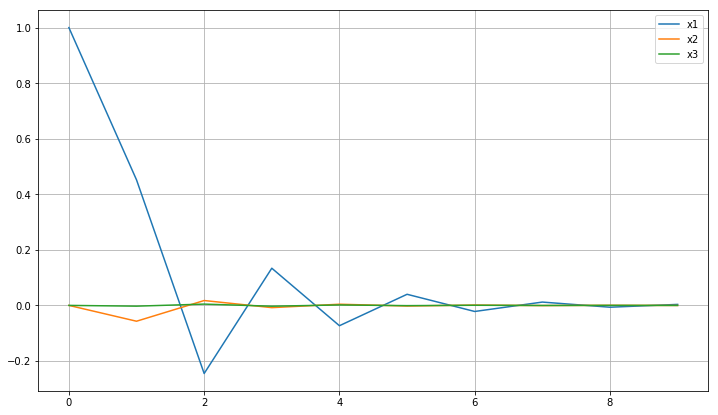

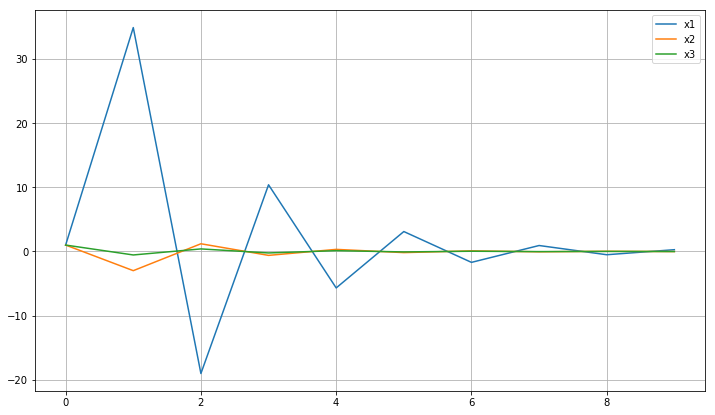

In [113]:
x1 = np.array([1,0,0]) #Начальное состояние. 
x1p = np.empty([0, 3])
for i in range(0, 10):
    x1p = np.append(x1p, [x1], axis = 0)
    x1 = np.matmul(M, x1)

x2 = np.array([1,1,1]) #Начальное состояние.
x2p = np.empty([0, 3])
for i in range(0, 10):
    x2p = np.append(x2p, [x2], axis = 0)
    x2 = np.matmul(M, x2)

plt.figure(figsize=(12,7))
plt.plot(x1p[:,0], label = "x1")
plt.plot(x1p[:,1], label = "x2")
plt.plot(x1p[:,2], label = "x3")
plt.grid()
plt.legend()
plt.show()
plt.close()

plt.figure(figsize=(12,7))
plt.plot(x2p[:,0], label = "x1")
plt.plot(x2p[:,1], label = "x2")
plt.plot(x2p[:,2], label = "x3")
plt.grid()
plt.legend()
plt.show()
plt.close()

In [145]:
#----------------------------Пункт 6-------------------------------#
t0 = 10.5387 #Берешь с Джури
d = m.floor(t/t0)
lyambda = np.array([1/T1, 1/(1.5*T1), 1/(2*T1), 1/(3*T1)])
tI = t0/(m.exp(t0/T1)-1)
krl = list(map(lambda x: (1 - m.exp(-t0 * x))/(K * (m.exp(t0/T1)-1)*(1 + d * (1 - m.exp(-t0 * x)))), lyambda))
kr = np.array(krl)
a = 1 - (t-3*t0)/t0
C1 =1 - m.exp(-a*t0/T1)
C2 = m.exp(-a*t0/T1) - m.exp(-t0/T1)

for i in range(4):
    a0 = tI
    a1 = -tI*(1+m.exp(-t0/T1))
    a2 = tI*m.exp(-t0/T1)
    a4 = K*kr[i]*C1*(tI + t0)
    a5 = K*kr[i]*(C2*(tI + t0) - C1*tI)
    a6 = -K*kr[i]*C2*tI
    print(str(a0) + "*x^6+" + str(a1) + "*x^5+" + str(a2) + "*x^4+" + str(a4) + "*x^2+" + str(a5) + "*x+" + str(a6))
#Для каждого полинома внизу надо найти корни и в таблицу в протоколе вписать модуль максимальног

61.868732620109334*x^6+-114.7326436511921*x^5+52.86391103108277*x^4+3.779783085409083*x^2+-0.7414628280438302*x+-2.126035210991728
61.868732620109334*x^6+-114.7326436511921*x^5+52.86391103108277*x^4+2.8600048318146287*x^2+-0.5610341183340112*x+-1.6086825192473422
61.868732620109334*x^6+-114.7326436511921*x^5+52.86391103108277*x^4+2.2999474127634847*x^2+-0.4511702059313116*x+-1.2936639676070933
61.868732620109334*x^6+-114.7326436511921*x^5+52.86391103108277*x^4+1.6525193104938212*x^2+-0.3241671846423371*x+-0.9295015511646465


In [115]:
for i in range(4):
    a0 = tI/tI
    a1 = -tI*(1+m.exp(-t0/T1))/tI
    a2 = tI*m.exp(-t0/T1)/tI
    a4 = K*kr[i]*C1*(tI + t0)/tI
    a5 = K*kr[i]*(C2*(tI + t0) - C1*tI)/tI
    a6 = -K*kr[i]*C2*tI/tI
    print(str(a0) + "*x^6+" + str(a1) + "*x^5+" + str(a2) + "*x^4+" + str(a4) + "*x^2+" + str(a5) + "*x+" + str(a6))

1.0*x^6+-1.825490427294711*x^5+0.8254904272947111*x^4+0.15218842769048702*x^2+-0.14845817982989276*x+0.018844369459987863
1.0*x^6+-1.825490427294711*x^5+0.8254904272947111*x^4+0.11386420706335383*x^2+-0.111073313424186*x+0.014098964150771122
1.0*x^6+-1.825490427294711*x^5+0.8254904272947111*x^4+0.09094017588453712*x^2+-0.08871116674315044*x+0.011260450608043284
1.0*x^6+-1.825490427294711*x^5+0.8254904272947111*x^4+0.06482477982610287*x^2+-0.06323587783184874*x+0.008026773912730347


In [116]:
#-------------------------------------Пункт №8-------------------------------------------#
#Прямой синтез
T0 = 0.03*T1/K
KR = np.array(list(map(lambda x: Kr_opt(x), lyambda)))
print("A1 = ", -KR)
print("A0 = ")
for i in range(4):
    A0 = KR[i]*(1 + T0/T_opt)
    print(A0)

A1 =  [-0.35863598 -0.27093878 -0.21770339 -0.15628705]
A0 = 
0.36469729299327375
0.27551792340227665
0.22138280082662715
0.15892845957409554


In [117]:
#Резонансный метод
print("A0 = " + str(K_Popt1*(1 + T_0opt1/T_Iopt1)) + "  " + str(K_Popt2 * (1 + T_0opt2/T_Iopt2)))
print("A1 = " + str(-K_Popt1) + "  " + str(-K_Popt2))

A0 = 1.0945182750103395  0.9343413109636787
A1 = -1.0153680419117692  -0.8618757680884328


In [140]:
1/1.79

0.5586592178770949

In [141]:
1/(1.79*(1+1/67*36))

0.3633996854151977

In [142]:
2.4969-2.6833

-0.1863999999999999

In [144]:
36/10.5

3.4285714285714284